In [1]:
from commander.network import NetworkManager
from commander.network.protocol import PingPacket
from time import time

nm = NetworkManager(port="COM3")
nm.open()



In [2]:
# Generate string for C++
print(nm._cpp_initial_output_decl())
print(nm.read_initial_output())

const size_t INITIAL_OUTPUT_STOP_MARKER_LENGTH = 22;
const byte INITIAL_OUTPUT_STOP_MARKER[22] = {0x45, 0x4E, 0x44, 0x20, 0x4F, 0x46, 0x20, 0x49, 0x4E, 0x49, 0x54, 0x49, 0x41, 0x4C, 0x49, 0x53, 0x41, 0x54, 0x49, 0x4F, 0x4E, 0x0A};
 ===================
CartPole Controller
START DEBUG INFORMATION
STEPPER_CURRENT: 1000
STEPPER_MICROSTEPS: 4
STEPPER_DISTANCE_PER_ROTATION: 40.84
END DEBUG INFORMATION

Setting up I2C.
Configuring buttons.
Setting up steppers.
Starting stepper library.
Initiating astepper 1.
Setting up stepper drivers.
Setting up stepper driver 1.
Starting stepper drivers.
Starting stepper driver 1.
Setting up rotary encoders.
Setting up rotary encoder 1.
Configuring limit switches.
Config finished.
Starting loop.
--------------

END OF INITIALISATION



In [3]:
ping_pkt = PingPacket()
ping_pkt.construct(timestamp=10)

nm.send_packet(ping_pkt)

pkt = nm.read_packet()
print(pkt.timestamp)

nm.serial.write(b"a")
pkt = nm.read_packet()
pkt

10


In [4]:
pkt.msg

'Received unknown packet with ID: 97'

In [4]:
times = []
trips = 25000  # 25000 * 0.004s ≈ 100s ≈ 1½ min
for i in range(50000):
    ping_pkt = PingPacket()
    ping_pkt.construct(timestamp=10)

    start_time = time()
    nm.send_packet(ping_pkt)
    pong_pkt = nm.read_packet()
    end_time = time()

    time_diff = end_time - start_time
    times.append(time_diff)

Freedman–Diaconis number of bins: 747


Text(0, 0.5, 'Probability')

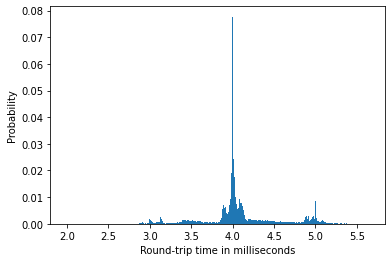

In [13]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

atimes = np.array(times)
stats.describe(atimes)

q25, q75 = np.percentile(atimes,[.25,.75])
bin_width = 2*(q75 - q25)*len(atimes)**(-1/3)
bins = round((atimes.max() - atimes.min())/bin_width)
weights = np.ones_like(atimes) / len(atimes)

print("Freedman–Diaconis number of bins:", bins)
plt.hist(atimes * 1000, weights=weights, bins = bins);
plt.xlabel("Round-trip time in milliseconds")
plt.ylabel("Probability")



In [6]:
nm.close()